# Problem 7.2 

## GDP versus infant mortality

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use("default")
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import random

In [2]:
# Import dataset
file_path = "/Users/guillaumedenis/Programmation/Python/A Student's Guide to Bayesian Statistics/All_data/posterior_gdpInfantMortality.csv"
df = pd.read_csv(file_path)

# Change column names
df.columns = ["country", "mortality", "gdp"]

# Drop missing values
df.dropna(subset = ["mortality", "gdp"], inplace = True)
df.reset_index(drop = True, inplace = True )

df.head()


,country,mortality,gdp
0,Afghanistan,154.0,2848.0
1,Albania,32.0,863.0
2,Algeria,44.0,1531.0
3,Angola,124.0,355.0
4,Antigua,24.0,6966.0


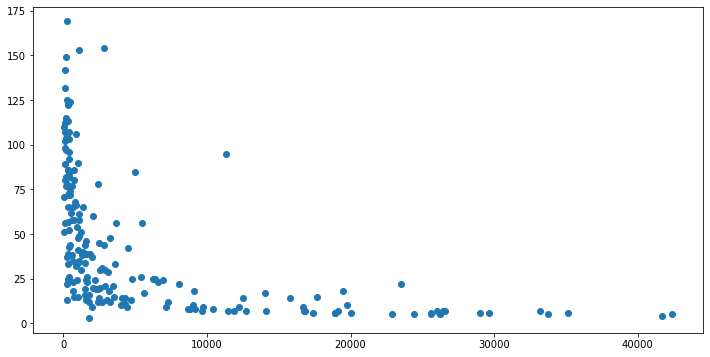

In [3]:
# Scatter plot
plt.figure(figsize = (12,6))
plt.scatter(x = df["gdp"], y = df["mortality"])


## Fit OLS

In [4]:
X = df["gdp"]
X = sm.add_constant(X)
y = df["mortality"]

# Fit linear model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     67.45
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           3.18e-14
Time:                        16:49:33   Log-Likelihood:                -949.02
No. Observations:                 193   AIC:                             1902.
Df Residuals:                     191   BIC:                             1909.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9239      2.874     19.804      0.0

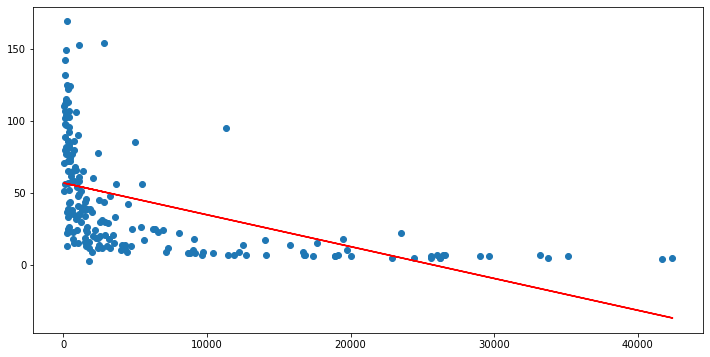

In [5]:
plt.figure(figsize = (12,6))
plt.scatter(x = df["gdp"], y = df["mortality"])
plt.plot(df["gdp"], results.fittedvalues, "red")

It is easy to see that the data doesn't follow a linear relation.

## Fit OLS log-log model

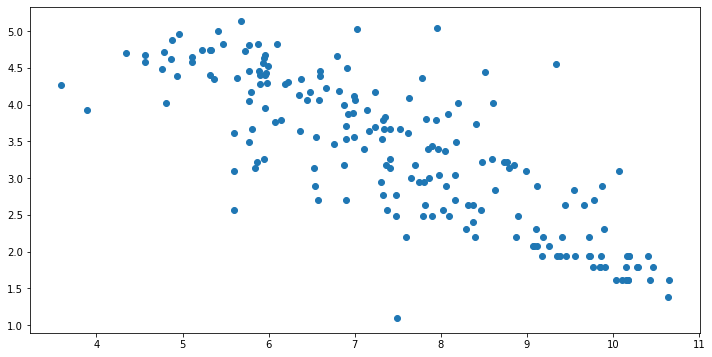

In [6]:
# Log transformation
df["mortality_log"] = np.log(df["mortality"])
df["gdp_log"] = np.log(df["gdp"])

# Plot data
plt.figure(figsize = (12,6))
plt.scatter(x = df["gdp_log"], y = df["mortality_log"]) # The relation is now linear

In [7]:
# Fit model
X_2 = df["gdp_log"]
X_2 = sm.add_constant(X_2)
y_2 = df["mortality_log"]

# Fit linear model
model_2 = sm.OLS(y_2, X_2)
results_2 = model_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:          mortality_log   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     363.7
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           4.32e-46
Time:                        16:49:33   Log-Likelihood:                -172.27
No. Observations:                 193   AIC:                             348.5
Df Residuals:                     191   BIC:                             355.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0452      0.199     35.379      0.0

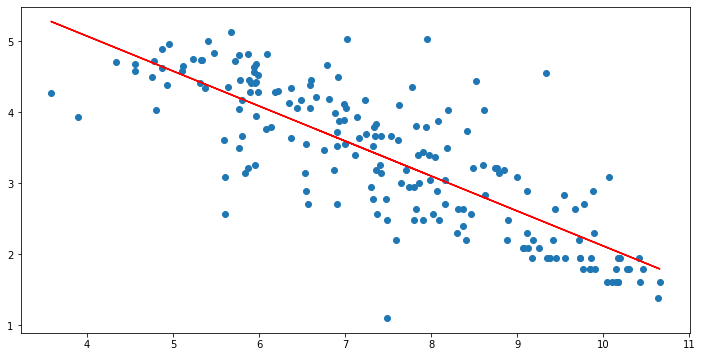

In [8]:
# Plot graph and regression line
plt.figure(figsize = (12,6))
plt.scatter(x = df["gdp_log"], y = df["mortality_log"])
plt.plot(df["gdp_log"], results_2.fittedvalues, "red")

## Bayesian log-log model

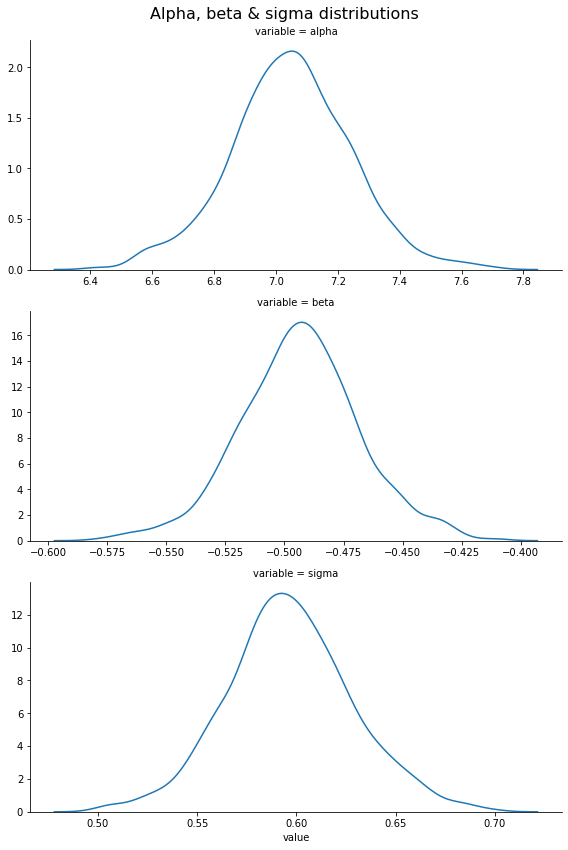

In [9]:
# Read data
file_path = "/Users/guillaumedenis/Programmation/Python/A Student's Guide to Bayesian Statistics/All_data/posterior_posteriorsgdpInfantMortality.csv"
df2 = pd.read_csv(file_path)


# Melt data for graph
df_graph = pd.melt(df2, value_vars = ["alpha", "beta", "sigma"])

# Plot graph
g = sns.FacetGrid(df_graph, row= "variable", height=4, aspect=2, sharey = False, sharex = False)
g.fig.suptitle('Alpha, beta & sigma distributions', fontsize=16)
g.map(sns.kdeplot, "value")

In [10]:
# Calculate quantile for inference
quantile_dic = {}

for column in df2.columns:
    lower = np.quantile(df2[column], 0.2)
    higher = np.quantile(df2[column], 0.8)
    quantile_dic[column] = [lower, higher]

    
quantile_dic

{'alpha': [6.8931409119308515, 7.2094094758456],
 'beta': [-0.5138054332111274, -0.47350861956293744],
 'sigma': [0.5716141507027298, 0.6218078955103004]}

In [11]:
df_sim = df

# Metrics dictionnary
metric_dic = {"Mean": [], "Min": [], "Max": []}

# Generate sample from posterior predictive distribution
num_sample = 1000


for i in range(1, num_sample):
    # Sample from posterior distribution
    alpha = random.sample(list(df2["alpha"]),1)[0]
    beta = random.sample(list(df2["beta"]),1)[0]
    sigma = random.sample(list(df2["sigma"]),1)[0]
    
    # Mean vector
    mean_gdp = alpha + beta * df["gdp_log"]
    
    # Sample from likehood distribution (we assume normal distribution)
    data = pd.Series(np.random.normal(list(mean_gdp), sigma, df.shape[0]))
    df_sim["data_" + str(i)] = data
    
    # Pertinent metrics
    metric_dic["Mean"].append(np.mean(data))
    metric_dic["Min"].append(np.min(data))
    metric_dic["Max"].append(np.max(data))
    

df_sim.head()

,country,mortality,gdp,mortality_log,gdp_log,data_1,data_2,data_3,data_4,data_5,...,data_990,data_991,data_992,data_993,data_994,data_995,data_996,data_997,data_998,data_999
0,Afghanistan,154.0,2848.0,5.036953,7.954372,4.089735,2.588671,2.165672,3.860757,3.390327,...,2.928376,2.128704,3.066549,3.707668,2.934210,2.272338,2.339087,2.974544,3.424807,3.133452
1,Albania,32.0,863.0,3.465736,6.760415,3.463019,3.442459,4.230501,4.762953,2.834638,...,4.531197,4.071564,2.635598,3.691859,3.793668,2.987968,3.593852,4.253244,3.489024,3.706367
2,Algeria,44.0,1531.0,3.784190,7.333676,4.722685,3.731257,4.336549,3.429942,3.936447,...,3.575845,5.093927,2.640785,3.434881,4.587328,2.959995,3.095701,3.487692,3.674321,3.584849
3,Angola,124.0,355.0,4.820282,5.872118,3.864762,4.448824,4.381524,5.471354,4.239595,...,4.289657,3.293369,5.254614,2.825477,4.033837,3.807708,3.105907,3.637652,3.726830,3.946552
4,Antigua,24.0,6966.0,3.178054,8.848796,2.862957,2.652455,3.528581,3.511414,2.175378,...,2.323590,3.780503,2.926473,2.410462,2.677073,3.524433,2.210504,2.418758,2.698913,2.585726


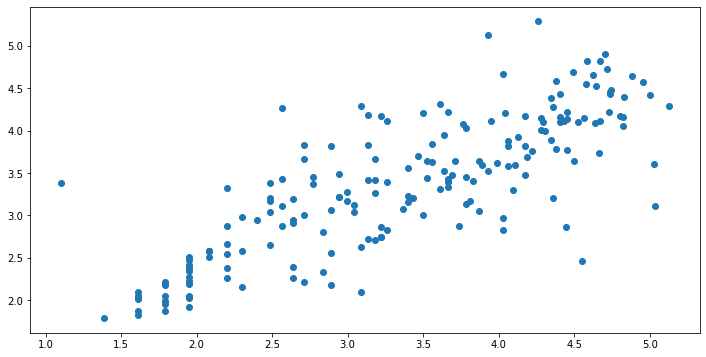

In [30]:
# Calculate mean of simulated data
df_sim["data_mean"] = 0
df_sim["data_mean"] = df_sim.iloc[:,5:-1].apply(lambda x: np.mean(x), axis = 1)

# Scatter plot data vs simulated data
plt.figure(figsize = (12,6))
plt.scatter(df["mortality_log"], df["data_mean"])
